## PEER class

* This is a quick tutorial on how to run the PEER class. 

* I refactored the PEER algorithm into a single python class because we were doing a bunch of new stuff with it, and it allowed me to iterate faster

* There are some pretty significant speedups involved too, since the original version just iterated through all voxels rather than doing vector calculations


### The parameters you will need to set for anything to run are commented with SET THIS

### Pre-Introduction

If you haven't already, run pip install -r requirements.txt to get all requirements. 

## Intro

To import the class, just do `from peer.PEER import PEER` 

In [1]:
from peer.PEER import PEER
import numpy as np

When you import a function in a jupyter notebook, calling that function with a ? at the end helps you read the function documentation

In [2]:
PEER??

In [3]:
# Initialize PEER
em_path = "/usr/share/fsl/5.0/data/standard/MNI152_T1_2mm_eye_mask.nii.gz" # path to mni eyemask SET THIS IF NOT RIGHT
run_global_signal_regression = False # Don't run GSR
pixels_in_x_direction = 1920 # SET THIS
pixels_in_y_direction = 1280 # SET THIS
output_directory = "/tmp/" # SET THIS TO WHEREVER YOU WANT YOUR OUTPUT
p = PEER(em_path, 
         run_global_signal_regression, 
         pixels_in_x_direction, 
         pixels_in_y_direction, 
         output_directory) 

The next thing we want to do is read in and the training image. We also want to zscore it on the time direction. 
The function `preprocess_train_data` does both at the same time

In [4]:
path_to_training_data = "/home/cbin-user/Documents/Misc/peer_analysis_v2/data/subj1/PEER1.nii.gz" #SET THIS
train = p.preprocess_train_data(path_to_training_data)


Load Data
Training data Loaded


In [5]:
train.shape # should be the same as input image

(91, 109, 91, 135)

Now we want to prepare the data to submit to our SVR. 
`prepare_data_for_SVR` unravels the fmri data dimensions to stim X voxels
and creates the targets in the x and y directions

In [6]:
stimulus_vals = "./peer/stim_vals.csv" # where the subjects were actually looking
train_list, x_target, y_target = p.prepare_data_for_svr(train, [], stimulus_vals) # don't worry about the [] 
train_matrix = np.array(train_list) #convert list to array

The []th volume(s) were removed.


In [7]:
train_matrix.shape # should be number of stim values by number of voxels

(27, 902629)

In [8]:
len(x_target) == train_matrix.shape[0] == len(y_target) # all these should be the same 

True

In [9]:
target = (x_target, y_target) # put both targets together
x_model, y_model = p.train_peer(train_matrix, target) # Run the training algorithm, return the models

[LibSVM][LibSVM]

In [10]:
# The models are just scikit-learn models on the backend
# lets test this on a new image
test_image = "/home/cbin-user/Documents/Misc/peer_analysis_v2/data/subj1/PEER2.nii.gz" # SET THIS
test = p.preprocess_train_data(test_image) # must read in and preprocess test image too
test_matrix = test.reshape((-1, test.shape[3])) # reshape on the time dimension


Load Data
Training data Loaded


In [11]:
print(test_matrix.shape) # The test matrix is transposed
test_matrix = test_matrix.T # Lets fix this

(902629, 135)


In [12]:
# Finally we can test this image
x_estimation, y_estimation = p.predict_fixations(x_model, y_model, test_matrix)


Predicting Fixations
Fixations saved to specified output directory.


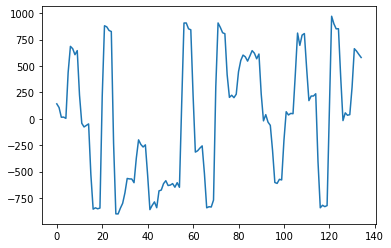

In [13]:
# Fingers crossed, everything went ok. Let's plot the results to see.
import matplotlib.pyplot as plt
plt.plot(x_estimation)
plt.show()

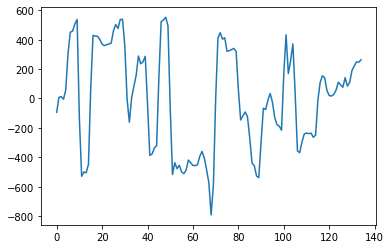

In [14]:
plt.plot(y_estimation)
plt.show()

If you want to test a non-PEER scan, you will have to read in the eyetracking code and test yourself.
